# PROJECT WORK

 In this, we are asked to predict whether a passenger on the titanic would have been survived or not.

## Introduction

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. This project explores a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

From a sample of the RMS Titanic data, we can see the various features present for each passenger on the ship:

* Survived: Outcome of survival (0 = No; 1 = Yes)
* Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
* Name: Name of passenger
* Sex: Sex of the passenger
* Age: Age of the passenger (Some entries contain NaN)
* SibSp: Number of siblings and spouses of the passenger aboard
* Parch: Number of parents and children of the passenger aboard
* Ticket: Ticket number of the passenger
* Fare: Fare paid by the passenger
* Cabin Cabin number of the passenger (Some entries contain NaN)
* Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

## Importing the Libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

## Getting the Data

In [2]:
data=pd.read_csv("titanic.csv")
data

FileNotFoundError: [Errno 2] File titanic.csv does not exist: 'titanic.csv'

## Data Exploration/Analysis

In [3]:
data.shape

(891, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature.

In [6]:
data.head(12)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


we can see that the features have widely different ranges, that we will need to convert into roughly the same scale. We can also spot some more features, that contain missing values (NaN = not a number), that wee need to deal with.

Let’s take a more detailed look at what data is actually missing:

In [7]:
total = data.isnull().sum().sort_values(ascending=False)
p_1 = data.isnull().sum()/data.isnull().count()*100
p_2 = (round(p_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, p_2], axis=1, keys=['Total', 'Percent%'])
missing_data.head(6)

,Total,Percent%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0
Parch,0,0.0


The Embarked feature has only 2 missing values, which can easily be filled. It will be much more tricky, to deal with the ‘Age’ feature, which has 177 missing values. The ‘Cabin’ feature needs further investigation, but it looks like that we might want to drop it from the dataset, since 77 % of it are missing.

In [8]:
#get the count of no of survivors
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Correlation
Here we will correlate some features.

seaborn.countplot() method is used to Show the counts of observations in each categorical bin using bars.

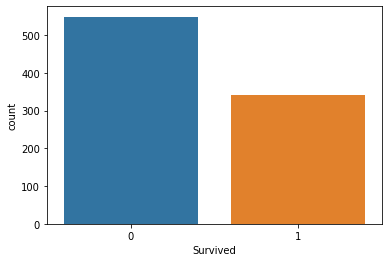

In [9]:
#Visualise the count of survivors
sns.countplot(data['Survived'])

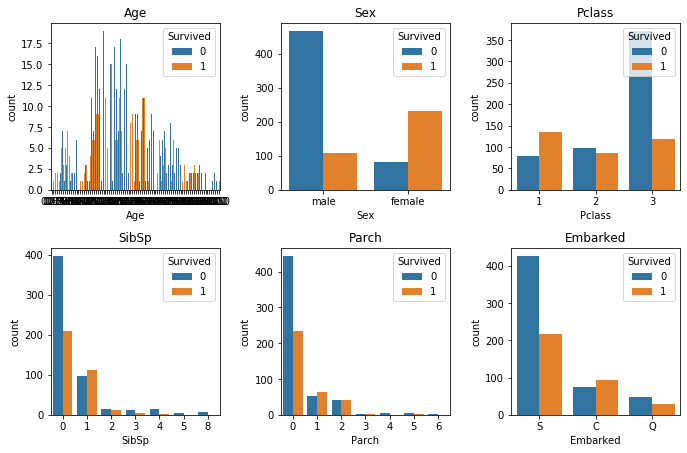

In [10]:
#visualise the count of survivors for column 'age','sex','pclass','Sibsp','parch','embarked'
cols=['Age','Sex','Pclass','SibSp','Parch','Embarked']
n_rows=2
n_cols=3
#the subplot grid and figure size of each graph
fig,axs=plt.subplots(n_rows,n_cols,figsize=(n_cols*3.2,n_rows*3.2))
for r in range(0,n_rows):
    for c in range(0,n_cols):
        i=r*n_cols+c #index to go through the no of columns
        ax=axs[r][c] #show where to position each subplot
        sns.countplot(data[cols[i]],hue=data['Survived'],ax=ax)
        ax.set_title(cols[i])
        ax.legend(title='Survived',loc='upper right')
plt.tight_layout()

In [11]:
#look at survival rate by sex
data.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [12]:
#look at survival rate by sex and class
data.pivot_table('Survived',index='Sex',columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


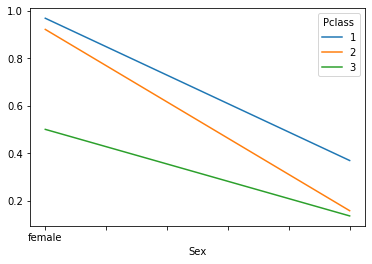

In [13]:
#look at survival rate by sex and class visually
data.pivot_table('Survived',index='Sex',columns='Pclass').plot()

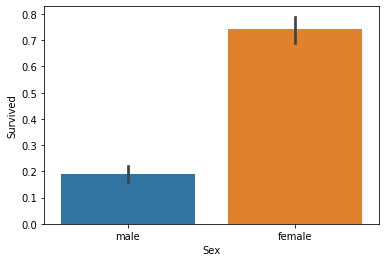

In [14]:
sns.barplot(x='Sex', y='Survived', data=data)

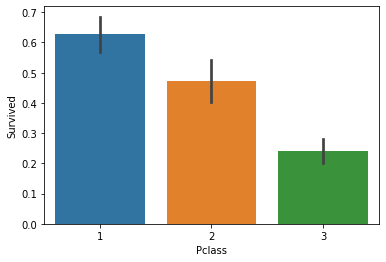

In [15]:
#plot survival rate of each class
sns.barplot(x='Pclass', y='Survived', data=data)

Here we see clearly, that Pclass is contributing to a persons chance of survival, especially if this person is in class 1.

In [16]:
#look at survival rate by age,sex and Pclass
age=pd.cut(data['Age'],[0,18,80])
data.pivot_table('Survived',['Sex',age],'Pclass')

Pclass                  1         2         3
Sex    Age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

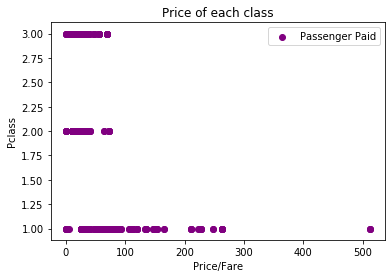

In [17]:
#plot the prices paid of each Pclass
plt.scatter(data['Fare'],data['Pclass'],color='purple',label='Passenger Paid')
plt.ylabel('Pclass')
plt.xlabel('Price/Fare')
plt.title('Price of each class')
plt.legend()
plt.show()

In [18]:
data['relatives'] = data['SibSp'] + data['Parch']
data.loc[data['relatives'] > 0, 'not_alone'] = 0
data.loc[data['relatives'] == 0, 'not_alone'] = 1
data['not_alone'] = data['not_alone'].astype(int)
data['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

In [19]:
#count the null values in each column
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
relatives        0
not_alone        0
dtype: int64

In [20]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
relatives        int64
not_alone        int32
dtype: object

## Data Preprocessing

First, We will drop ‘PassengerId’ from the train set, because it does not contribute to a persons survival probability. 

In [21]:
data = data.drop(['PassengerId'], axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,1
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,3,0
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1


##### Checking the density of null values in Cabin

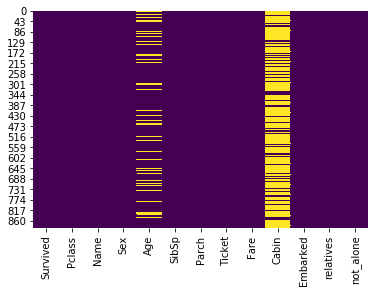

In [22]:
import seaborn as sns
sns.heatmap(data=data.isnull(),cbar=False,cmap="viridis")

First I thought, we have to delete the ‘Cabin’ variable but then I found something interesting. A cabin number looks like ‘C123’ and the letter refers to the deck. Therefore we’re going to extract these and create a new feature, that contains a persons deck. Afterwords we will convert the feature into a numeric variable.

In [23]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}

data['Cabin'] = data['Cabin'].fillna("U0")
data['Deck'] = data['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
data['Deck'] = data['Deck'].map(deck)
data['Deck'] = data['Deck'].fillna(0)
data['Deck'] = data['Deck'].astype(int)

In [24]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U0,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U0,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U0,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,U0,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,U0,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,0,1,3


In [25]:
# we can now drop the cabin feature
data= data.drop(['Cabin'], axis=1)
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


As there are many null values in Age column so we will just replace them by taking mean of all other ages.

In [26]:
values = { 'Age':round(data.Age.mean())}
print('values:',values)
data = data.fillna(value=values)
data

values: {'Age': 30}


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,0,1,3


In [27]:
data['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

Since the Embarked feature has only 2 missing values, we will just fill these with the most common one i.e, mode.

In [28]:
data['Embarked'].replace(to_replace=np.nan,value=data['Embarked'].mode()[0],inplace=True)

We just check if these are replaced or not

In [29]:
data['Embarked'].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

## Converting Features:

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(2), int32(2), int64(5), object(4)
memory usage: 83.7+ KB


Above you can see that ‘Fare’ is a float.Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [31]:
#converting float value to int
data['Fare'] = data['Fare'].astype(int)

In [32]:
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7,S,1,0,8
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71,C,1,0,3
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7,S,0,1,8
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53,S,1,0,3
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8,S,0,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13,S,0,1,8
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30,S,0,1,2
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23,S,3,0,8
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30,C,0,1,3


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    int32  
 9   Embarked   891 non-null    object 
 10  relatives  891 non-null    int64  
 11  not_alone  891 non-null    int32  
 12  Deck       891 non-null    int32  
dtypes: float64(1), int32(3), int64(5), object(4)
memory usage: 80.2+ KB


We will use the Name feature to extract the Titles from the Name, so that we can build a new feature out of that.

In [34]:
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

# extract titles
data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
# replace titles with a more common title or as Rare
data['Title'] = data['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr','Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
data['Title'] = data['Title'].replace('Mlle', 'Miss')
data['Title'] = data['Title'].replace('Ms', 'Miss')
data['Title'] = data['Title'].replace('Mme', 'Mrs')

# convert titles into numbers
data['Title'] = data['Title'].map(titles)

data = data.drop(['Name'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,male,22.0,1,0,A/5 21171,7,S,1,0,8,1
1,1,1,female,38.0,1,0,PC 17599,71,C,1,0,3,3
2,1,3,female,26.0,0,0,STON/O2. 3101282,7,S,0,1,8,2
3,1,1,female,35.0,1,0,113803,53,S,1,0,3,3
4,0,3,male,35.0,0,0,373450,8,S,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13,S,0,1,8,5
887,1,1,female,19.0,0,0,112053,30,S,0,1,2,2
888,0,3,female,30.0,1,2,W./C. 6607,23,S,3,0,8,2
889,1,1,male,26.0,0,0,111369,30,C,0,1,3,1


In [35]:
#print unique values in the column
print(data['Sex'].unique())
print(data['Embarked'].unique())

['male' 'female']
['S' 'C' 'Q']


Here we are encoding categorical variable.Convert ‘Sex’ and 'Embarked' feature into numeric.

In [36]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data.iloc[:,2]=labelencoder.fit_transform(data.iloc[:,2].values)
data.iloc[:,8]=labelencoder.fit_transform(data.iloc[:,8].values)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22.0,1,0,A/5 21171,7,2,1,0,8,1
1,1,1,0,38.0,1,0,PC 17599,71,0,1,0,3,3
2,1,3,0,26.0,0,0,STON/O2. 3101282,7,2,0,1,8,2
3,1,1,0,35.0,1,0,113803,53,2,1,0,3,3
4,0,3,1,35.0,0,0,373450,8,2,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,211536,13,2,0,1,8,5
887,1,1,0,19.0,0,0,112053,30,2,0,1,2,2
888,0,3,0,30.0,1,2,W./C. 6607,23,2,3,0,8,2
889,1,1,1,26.0,0,0,111369,30,0,0,1,3,1


In [37]:
print(data['Sex'].unique())
print(data['Embarked'].unique())

[1 0]
[2 0 1]


In [38]:
data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

Since the Ticket attribute has 681 unique tickets, it will be a bit tricky to convert them into useful categories. So we will drop it from the dataset.

In [39]:
data = data.drop(['Ticket'], axis=1)
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,22.0,1,0,7,2,1,0,8,1
1,1,1,0,38.0,1,0,71,0,1,0,3,3
2,1,3,0,26.0,0,0,7,2,0,1,8,2
3,1,1,0,35.0,1,0,53,2,1,0,3,3
4,0,3,1,35.0,0,0,8,2,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13,2,0,1,8,5
887,1,1,0,19.0,0,0,30,2,0,1,2,2
888,0,3,0,30.0,1,2,23,2,3,0,8,2
889,1,1,1,26.0,0,0,30,0,0,1,3,1


## Creating Categories:


We will now create categories within the following features:

### Age:

Now we need to convert the ‘age’ feature. First we will convert it from float into integer. Then we will create the new ‘AgeGroup” variable, by categorizing every age into a group. 

In [40]:
data['Age'] = data['Age'].astype(int)
data.loc[ data['Age'] <= 11, 'Age'] = 0
data.loc[(data['Age'] > 11) & (data['Age'] <= 18), 'Age'] = 1
data.loc[(data['Age'] > 18) & (data['Age'] <= 22), 'Age'] = 2
data.loc[(data['Age'] > 22) & (data['Age'] <= 27), 'Age'] = 3
data.loc[(data['Age'] > 27) & (data['Age'] <= 33), 'Age'] = 4
data.loc[(data['Age'] > 33) & (data['Age'] <= 40), 'Age'] = 5
data.loc[(data['Age'] > 40) & (data['Age'] <= 66), 'Age'] = 6
data.loc[ data['Age'] > 66, 'Age'] = 6

In [41]:
# let's see how it's distributed 
data['Age'].value_counts()

4    303
6    148
3    106
5    103
2     92
1     71
0     68
Name: Age, dtype: int64

### Fare:

For the ‘Fare’ feature, we need to do the same as with the ‘Age’ feature. But it isn’t that easy, because if we cut the range of the fare values into a few equally big categories, 80% of the values would fall into the first category. Fortunately, we can use sklearn “qcut()” function, that we can use to see, how we can form the categories.

In [42]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,7,2,1,0,8,1
1,1,1,0,5,1,0,71,0,1,0,3,3
2,1,3,0,3,0,0,7,2,0,1,8,2
3,1,1,0,5,1,0,53,2,1,0,3,3
4,0,3,1,5,0,0,8,2,0,1,8,1
5,0,3,1,4,0,0,8,1,0,1,8,1
6,0,1,1,6,0,0,51,2,0,1,5,1
7,0,3,1,0,3,1,21,2,4,0,8,4
8,1,3,0,3,0,2,11,2,2,0,8,3
9,1,2,0,1,1,0,30,0,1,0,8,3


In [43]:
data.loc[ data['Fare'] <= 7.91, 'Fare'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare'] <= 14.454), 'Fare'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare'] <= 31), 'Fare']   = 2
data.loc[(data['Fare'] > 31) & (data['Fare'] <= 99), 'Fare']   = 3
data.loc[(data['Fare'] > 99) & (data['Fare'] <= 250), 'Fare']   = 4
data.loc[ data['Fare'] > 250, 'Fare'] = 5
data['Fare'] = data['Fare'].astype(int)


In [44]:
data.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,0,3,1,2,1,0,0,2,1,0,8,1
1,1,1,0,5,1,0,3,0,1,0,3,3
2,1,3,0,3,0,0,0,2,0,1,8,2
3,1,1,0,5,1,0,3,2,1,0,3,3
4,0,3,1,5,0,0,1,2,0,1,8,1
5,0,3,1,4,0,0,1,1,0,1,8,1
6,0,1,1,6,0,0,3,2,0,1,5,1
7,0,3,1,0,3,1,2,2,4,0,8,4
8,1,3,0,3,0,2,1,2,2,0,8,3
9,1,2,0,1,1,0,2,0,1,0,8,3


In [45]:
data.dtypes

Survived     int64
Pclass       int64
Sex          int32
Age          int32
SibSp        int64
Parch        int64
Fare         int32
Embarked     int32
relatives    int64
not_alone    int32
Deck         int32
Title        int64
dtype: object

# Split into independent and dependent data

In [46]:
#split the data into independent 'X' and dependent 'Y' variables
X=data.drop("Survived", axis=1)
Y=data[["Survived"]]

In [47]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
0,3,1,2,1,0,0,2,1,0,8,1
1,1,0,5,1,0,3,0,1,0,3,3
2,3,0,3,0,0,0,2,0,1,8,2
3,1,0,5,1,0,3,2,1,0,3,3
4,3,1,5,0,0,1,2,0,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,3,0,0,1,2,0,1,8,5
887,1,0,2,0,0,2,2,0,1,2,2
888,3,0,4,1,2,2,2,3,0,8,2
889,1,1,3,0,0,2,0,0,1,3,1


In [48]:
Y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


# Splitting the data into training and testing set

In [49]:
#split the dataset into 80% training and 20% tetsing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)


In [50]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
857,1,1,6,0,0,2,2,0,1,5,1
52,1,0,6,1,0,3,0,1,0,4,3
386,3,1,0,5,2,3,2,7,0,8,4
124,1,1,6,0,1,3,2,1,0,4,1
578,3,0,4,1,0,1,0,1,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...
835,1,0,5,1,1,3,0,2,0,5,2
192,3,0,2,1,0,0,2,1,0,8,2
629,3,1,4,0,0,0,1,0,1,8,1
559,3,0,5,1,0,2,2,1,0,8,3


In [51]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,relatives,not_alone,Deck,Title
495,3,1,4,0,0,1,0,0,1,8,1
648,3,1,4,0,0,0,2,0,1,8,1
278,3,1,0,4,1,2,1,5,0,8,4
31,1,0,4,1,0,4,0,1,0,2,3
255,3,0,4,0,2,2,0,2,0,8,3
...,...,...,...,...,...,...,...,...,...,...,...
263,1,1,5,0,0,0,2,0,1,2,1
718,3,1,4,0,0,2,1,0,1,8,1
620,3,1,3,1,0,1,0,1,0,8,1
786,3,0,1,0,0,0,2,0,1,8,2


In [52]:
Y_train

,Survived
857,1
52,1
386,0
124,0
578,0
...,...
835,1
192,1
629,0
559,1


# Applying Machine Learning Algorithms

## Logistic Regression

In [53]:
#Use logistic regression
from sklearn.linear_model import LogisticRegression
log=LogisticRegression(random_state=0)
log.fit(X_train,Y_train)
Y_pred1=log.predict(X_test)
log.score(X_test,Y_test)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7947761194029851

In [54]:
# Importing evaluation Metrics
from sklearn.metrics import classification_report, f1_score, confusion_matrix, accuracy_score

## Evaluation Metrics

In [55]:
print("Classification Report")
print(classification_report(Y_test,Y_pred1))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred1))
print("F1- Score")
print(f1_score(Y_test,Y_pred1))
print("Accuracy Score")
acc_log=accuracy_score(Y_test,Y_pred1)
print(acc_log)


Classification Report
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       168
           1       0.71      0.76      0.73       100

    accuracy                           0.79       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.80      0.79      0.80       268

Confusion Matrix
[[137  31]
 [ 24  76]]
F1- Score
0.7342995169082127
Accuracy Score
0.7947761194029851


## KNN

In [56]:
#Use KNeighbours
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
knn.fit(X_train,Y_train)
Y_pred2=knn.predict(X_test)
knn.score(X_test,Y_test)
    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.8022388059701493

## Evaluation Metrics

In [57]:
print("Classification Report")
print(classification_report(Y_test,Y_pred2))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred2))
print("F1- Score")
print(f1_score(Y_test,Y_pred2))
print("Accuracy Score")
acc_knn=accuracy_score(Y_test,Y_pred2)
print(acc_knn)



Classification Report
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       168
           1       0.74      0.73      0.73       100

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268

Confusion Matrix
[[142  26]
 [ 27  73]]
F1- Score
0.7336683417085427
Accuracy Score
0.8022388059701493


## SVC (linear)

In [58]:
#Use SVC (linear kernel)
from sklearn.svm import SVC,LinearSVC
svc_lin=SVC(kernel='linear',random_state=0)
svc_lin.fit(X_train,Y_train)
Y_pred3=svc_lin.predict(X_test)
svc_lin.score(X_test,Y_test)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7873134328358209

## Evaluation Metrics

In [59]:
print("Classification Report")
print(classification_report(Y_test,Y_pred3))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred3))
print("F1- Score")
print(f1_score(Y_test,Y_pred3))
print("Accuracy Score")
acc_svc_lin=accuracy_score(Y_test,Y_pred3)
print(acc_svc_lin)



Classification Report
              precision    recall  f1-score   support

           0       0.84      0.81      0.83       168
           1       0.70      0.75      0.72       100

    accuracy                           0.79       268
   macro avg       0.77      0.78      0.78       268
weighted avg       0.79      0.79      0.79       268

Confusion Matrix
[[136  32]
 [ 25  75]]
F1- Score
0.7246376811594203
Accuracy Score
0.7873134328358209


## GaussianNB

In [60]:
#Use GaussianNB
from sklearn.naive_bayes import GaussianNB
gauss=GaussianNB()
gauss.fit(X_train,Y_train)
Y_pred5=gauss.predict(X_test)
gauss.score(X_test,Y_test)
    

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7798507462686567

## Evaluation Metrics

In [61]:
print("Classification Report")
print(classification_report(Y_test,Y_pred5))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred5))
print("F1- Score")
print(f1_score(Y_test,Y_pred5))
print("Accuracy Score")
acc_gauss=accuracy_score(Y_test,Y_pred5)
print(acc_gauss)



Classification Report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81       168
           1       0.66      0.85      0.74       100

    accuracy                           0.78       268
   macro avg       0.78      0.79      0.78       268
weighted avg       0.81      0.78      0.78       268

Confusion Matrix
[[124  44]
 [ 15  85]]
F1- Score
0.7423580786026202
Accuracy Score
0.7798507462686567


## Decision Tree

In [62]:
#Use Decision Tree
from sklearn.tree import DecisionTreeClassifier
tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
tree.fit(X_train,Y_train)
Y_pred6=tree.predict(X_test)
tree.score(X_test,Y_test)
    

0.8022388059701493

## Evaluation Metrics

In [63]:
print("Classification Report")
print(classification_report(Y_test,Y_pred6))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred6))
print("F1- Score")
print(f1_score(Y_test,Y_pred6))
print("Accuracy Score")
acc_tree=accuracy_score(Y_test,Y_pred6)
print(acc_tree)



Classification Report
              precision    recall  f1-score   support

           0       0.82      0.88      0.85       168
           1       0.77      0.67      0.72       100

    accuracy                           0.80       268
   macro avg       0.79      0.78      0.78       268
weighted avg       0.80      0.80      0.80       268

Confusion Matrix
[[148  20]
 [ 33  67]]
F1- Score
0.716577540106952
Accuracy Score
0.8022388059701493


## RandomForest

In [64]:
#Use RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)
Y_pred7=forest.predict(X_test)
forest.score(X_test,Y_test)

    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.832089552238806

## Evaluation Metrics

In [65]:
print("Classification Report")
print(classification_report(Y_test,Y_pred7))
print("Confusion Matrix")
print(confusion_matrix(Y_test,Y_pred7))
print("F1- Score")
print(f1_score(Y_test,Y_pred7))
print("Accuracy Score")
acc_forest=accuracy_score(Y_test,Y_pred7)
print(acc_forest)



Classification Report
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       168
           1       0.80      0.73      0.76       100

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268

Confusion Matrix
[[150  18]
 [ 27  73]]
F1- Score
0.7643979057591622
Accuracy Score
0.832089552238806


# Printing the accuracies of all the models

In [66]:
results = pd.DataFrame({
    'Model': ['SVC (linear kernel)', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree'],
    'Score': [acc_svc_lin, acc_knn, acc_log, acc_forest, acc_gauss, acc_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(8)


,Model
Score,
0.832090,Random Forest
0.802239,KNN
0.802239,Decision Tree
0.794776,Logistic Regression
0.787313,SVC (linear kernel)
0.779851,Naive Bayes


From above we can see that Random Forest has the highest accuracy of 83% among others.Now,we will apply Cross Validation on Random Forest to improve the accuracy.

# Cross Validation

In [67]:
from sklearn.model_selection import cross_val_score
#rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(forest, X_train, Y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

Scores: [0.77777778 0.82539683 0.80952381 0.77419355 0.79032258 0.83870968
 0.74193548 0.79032258 0.80645161 0.85483871]
Mean: 0.8009472606246801
Standard Deviation: 0.03161118188964187


# Feature Importance

In [68]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)


,importance
feature,
Title,0.211
Age,0.172
Sex,0.123
Fare,0.104
Deck,0.091
Pclass,0.087
relatives,0.065
Embarked,0.058
SibSp,0.045


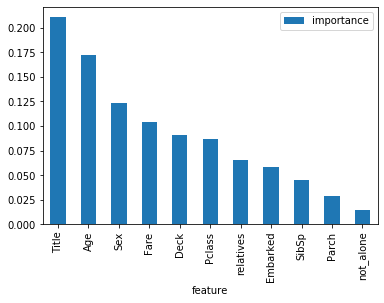

In [69]:
importances.plot.bar()

#### From above plot,we conclude that not_alone and Parch are not as important as compared to other features.So,we can drop them from the table as it will not affect the accuracy much.

In [70]:
X_train  = X_train.drop("not_alone", axis=1)
X_test  = X_test.drop("not_alone", axis=1)

X_train  = X_train.drop("Parch", axis=1)
X_test  = X_test.drop("Parch", axis=1)

In [71]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title
857,1,1,6,0,2,2,0,5,1
52,1,0,6,1,3,0,1,4,3
386,3,1,0,5,3,2,7,8,4
124,1,1,6,0,3,2,1,4,1
578,3,0,4,1,1,0,1,8,3
...,...,...,...,...,...,...,...,...,...
835,1,0,5,1,3,0,2,5,2
192,3,0,2,1,0,2,1,8,2
629,3,1,4,0,0,1,0,8,1
559,3,0,5,1,2,2,1,8,3


In [72]:
X_test

,Pclass,Sex,Age,SibSp,Fare,Embarked,relatives,Deck,Title
495,3,1,4,0,1,0,0,8,1
648,3,1,4,0,0,2,0,8,1
278,3,1,0,4,2,1,5,8,4
31,1,0,4,1,4,0,1,2,3
255,3,0,4,0,2,0,2,8,3
...,...,...,...,...,...,...,...,...,...
263,1,1,5,0,0,2,0,2,1
718,3,1,4,0,2,1,0,8,1
620,3,1,3,1,1,0,1,8,1
786,3,0,1,0,0,2,0,8,2


#### Again train the model using Random Forest after dropping the unimportant features.

In [73]:
forest=RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
forest.fit(X_train,Y_train)
Y_prediction=forest.predict(X_test)
forest.score(X_test,Y_test)

    

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.8432835820895522

### Confusion Matrix and Accuracy 

In [74]:

print(confusion_matrix(Y_test, Y_prediction))
acc_tree1=accuracy_score(Y_test, Y_prediction)
print(acc_tree1)


[[151  17]
 [ 25  75]]
0.8432835820895522


### Hence, Random Forest is the best algorithm having accuracy 84.3%.

In [75]:
#print prediction of Random Forest Classifier model
Y_prediction1=pd.DataFrame(Y_prediction.reshape(len(Y_prediction),1),columns=['Survived'])
print(Y_prediction1)


     Survived
0           0
1           0
2           0
3           1
4           1
..        ...
263         0
264         0
265         0
266         0
267         0

[268 rows x 1 columns]


In [76]:
Pclass=2
Sex=0
Age=2
SibSp=0
Fare=0
Embarked=2
Relatives=0
Deck=1
Title=2
my_survival=[[Pclass,Sex,Age,SibSp,Fare,Embarked,Relatives,Deck,Title]]
my_pred=forest.predict(my_survival)
print(my_pred)

if my_pred==0:
    print("oh no! You would not have been Survived")
else:
    print("Nice, You would have been Survived!")

[1]
Nice, You would have been Survived!
